In [1]:
#import spacy
import nltk
nltk.download('punkt')
#nltk.download("gutenberg")
#from nltk.corpus import gutenberg
import requests
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [421]:
#nlp = spacy.load('en')
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

In [326]:
def read_books(url):
  r = requests.get(url)
  # What comes back includes headers and other HTTP stuff, get just the body of the response
  t = r.text
  return t


#save all the books
the_extra_ordinary_adv_lupin = 'https://www.gutenberg.org/files/6133/6133-0.txt'
arsene_lupin = 'https://www.gutenberg.org/cache/epub/4014/pg4014.txt'
lupin_vs_herlock_sholmes = 'https://www.gutenberg.org/files/40203/40203-0.txt'
the_hollow_needle = 'https://www.gutenberg.org/files/4017/4017-0.txt'
the_confession_of_lupin = 'https://www.gutenberg.org/cache/epub/28093/pg28093.txt'


#read all the books one by one

book1 = read_books(the_extra_ordinary_adv_lupin)
book2 = read_books(arsene_lupin)
book3 = read_books(lupin_vs_herlock_sholmes)
book4 = read_books(the_hollow_needle)
book5 = read_books(the_confession_of_lupin)

book_list=[book1,book2,book3,book4,book5]

In [327]:
# Answers for question 1-6
Q1_list=[None]*5
Q2_list=[None]*5
Q3_list=[None]*5
Q4_list=[None]*5
Q5_list=[None]*5
Q6_list=[None]*5

In [617]:
book_index = 3
text = book_list[book_index-1]

In [618]:
# divide chapter function1
def chapter_divider1(text):
    Roman_numeric = ["I","II","III","IV","V","VI","VII","VIII","IX","X",
                 "XI","XII","XIII","XIV","XV","XVI","XVII","XVIII","XIX","XX",
                 "XXI","XXII","XXIII","XXIV","XXV","XXVI","XXVII","XXVIII","XXIX","XXX",
                 "XXXI","XXXII","XXXIII","XXXIV","XXXV","XXXVI","XXXVII","XXXVIII","XXXIX","XL",
                ]

    chapter_list1 = []
    for i in range(0,len(Roman_numeric)-1):
        Rn1=Roman_numeric[i]
        Rn2=Roman_numeric[i+1]
        #print(Rn1,Rn2)
        pattern="\s"+Rn1+"\."+".*[\.\w\s\r\n]*?"+Rn2+"\.\s"
        match = re.search(pattern, text) 

        if match:
    #         print(match.group())
    #         print(match.start())
#             print(match.end())
            last_end=match.end()
            pattern="(?<="+Rn1+"\.)"+".*(?=\r)"
            result=re.findall(pattern, match.group())
            #print(result[0])
            pattern="(?<=\s)\w.*"
            result=re.findall(pattern, result[0])
            pattern="(\s){3,}"
            match=re.search(pattern, result[0])
            if match:
                result[0]=result[0][0:match.start()]
#             print(result[0])
            chapter_list1.append(result[0])
        else:
            pattern="(?<="+Rn1+"\.)"+".*(?=\r)"
#             print(text[last_end-10:last_end+80])
            result=re.findall(pattern, text[last_end-10:last_end+100])
            if result:
#                 print(result[0])
                pattern="(?<=\s)\w.*"
                result=re.findall(pattern, result[0])
                pattern="(\s){3,}"
                match=re.search(pattern, result[0])
                if match:
                    result[0]=result[0][0:match.start()]
                chapter_list1.append(result[0])
            break
            #print("pattern not found")
    
    print("list1:",len(chapter_list1),chapter_list1)
    return(chapter_list1)


#chapter_list1=chapter_divider1(book1)

# divide chapter function2
def chapter_divider2(text):
    chapter_list2 = []
    pattern="[IVX]\.[\s\r\n]+"+".*(?=\r)"
    result=re.findall(pattern, text)
    #print(result)
    #print(len(result))

    chapter_count=len(result)
    
    position_list=[]
    
    for r in result:
        #print(r)
        match=re.search(r, text)
        if match:
            position=match.end()
            position_list.append(position)
        else:
            position_list.append(0)
    
    for i in range(0,len(result)):
        if abs(position_list[i+1]-position_list[i])<100:
            r=result[i]
            pattern="(?<=\s)\w.*"
            new_r=re.findall(pattern, r)
            pattern="(\s){3,}"
            match=re.search(pattern, new_r[0])
            if match:
                new_r[0]=new_r[0][0:match.start()]
            if (new_r[0] in chapter_list2):
                break
            else:
                chapter_list2.append(new_r[0])
        else:
            r=result[i]
            pattern="(?<=\s)\w.*"
            new_r=re.findall(pattern, r)
            pattern="(\s){3,}"
            match=re.search(pattern, new_r[0])
            if match:
                new_r[0]=new_r[0][0:match.start()]
            if (new_r[0] in chapter_list2):
                break
            else:
                chapter_list2.append(new_r[0])
            break
    
    
    #print(position_list)
    
    print("list2:",len(chapter_list2),chapter_list2)
    
    return(chapter_list2)
    

#chapter_list2=chapter_divider2(book1)
#print(len(chapter_list))

def chapter_divider(text):
    chapter_list1=chapter_divider1(text)
    chapter_list2=chapter_divider2(text)
    
    correct_flag_short=True
    
    for i in range(0,min(len(chapter_list1),len(chapter_list2))):
        if chapter_list1[i] != chapter_list2[i]:
            correct_flag_short=False
            
    if correct_flag_short:
        if len(chapter_list1)<len(chapter_list2):
            correct_flag_long = chapter_check(chapter_list1,chapter_list2)
        else:
            correct_flag_long = chapter_check(chapter_list2,chapter_list1)
    else:
        return("wrong list")
        
    if correct_flag_long:
        print("Correct:",len(chapter_list2),chapter_list2)
        return(chapter_list2)
    else:
        print("Correct:",len(chapter_list1),chapter_list1)
        return chapter_list1

def chapter_check(chapter_short,chapter_long):
    correct_flag = True
    for i in range(len(chapter_short),len(chapter_long)):
        chaptername_check = chapter_long[i]
        print(chaptername_check)
        for chaptername in chapter_short:
            
            Uppercheck1 = (chaptername_check.upper() in chaptername.upper())
            Uppercheck2 = (chaptername.upper() in chaptername_check.upper())
            Uppercheck  = Uppercheck1 | Uppercheck2
            Lowercheck1 = (chaptername_check.lower() in chaptername.lower())
            Lowercheck2 = (chaptername.lower() in chaptername_check.lower())
            Lowercheck  = Lowercheck1 | Lowercheck2
#             print(chaptername_check.upper(),chaptername.upper(),Uppercheck)
#             print(chaptername_check.lower(),chaptername.lower(),Lowercheck)
            if Uppercheck | Lowercheck :
                correct_flag = False
                break
    
    return correct_flag 
        
#chapter_divider(book3)

In [619]:
#identify text in each chapter
def chapter_text_find(text):
    chapter_list=chapter_divider(text)
    
    chapter_text=[]
    chapter_count=len(chapter_list)
    chapter_name = chapter_list[chapter_count-1]
    match = re.search(chapter_name, text) 
    n_text=text[match.end():len(text)]

    span_list=[]
    for i in range(0,chapter_count):
        chapter_name=chapter_list[i]
        pattern="[^a-zA-Z\s]"
        chapter_name_clear=re.sub(pattern, ".",chapter_name)
        normal_flag = False
        upper_flag = False
        match_normal = re.search(chapter_name_clear, n_text) 
        match_upper = re.search(chapter_name_clear.upper(), n_text)
        if match_normal:
            match = match_normal
            normal_flag = True
        if match_upper:
            match = match_upper
            upper_flag = True
        if (normal_flag & upper_flag):
            if match_normal.end()<match_upper.end():
                match = match_normal
            else:
                match = match_upper
        
        print(chapter_name_clear)
        print(match.group())
        print(match.span())
        
        span_list.append(match.span())
    span_list.append([len(n_text),len(n_text)])
    print(span_list)
    for i in range(0,chapter_count):
        textinchapter=n_text[span_list[i][1]:span_list[i+1][0]]
        chapter_text.append(textinchapter)
    print("Chapter text number:",len(chapter_text))
    return chapter_text



#get chapter_text
chapter_text=chapter_text_find(text)

list1: 8 ['Lottery Ticket No. 514', 'The Blue Diamond', 'Herlock Sholmes Opens Hostilities', 'Light in the Darkness', 'An Abduction', 'Second Arrest of ArsÃ¨ne Lupin', 'The Jewish Lamp', 'The Shipwreck']
list2: 9 ['Lottery Ticket No. 514', 'The Blue Diamond', 'Herlock Sholmes Opens Hostilities', 'Light in the Darkness', 'An Abduction', 'Second Arrest of ArsÃ¨ne Lupin', 'The Jewish Lamp', 'The Shipwreck', 'LOTTERY TICKET NO. 514.']
LOTTERY TICKET NO. 514.
Correct: 8 ['Lottery Ticket No. 514', 'The Blue Diamond', 'Herlock Sholmes Opens Hostilities', 'Light in the Darkness', 'An Abduction', 'Second Arrest of ArsÃ¨ne Lupin', 'The Jewish Lamp', 'The Shipwreck']
Lottery Ticket No. ...
LOTTERY TICKET NO. 514
(22, 44)
The Blue Diamond
THE BLUE DIAMOND
(47159, 47175)
Herlock Sholmes Opens Hostilities
HERLOCK SHOLMES OPENS HOSTILITIES
(92181, 92214)
Light in the Darkness
LIGHT IN THE DARKNESS
(135763, 135784)
An Abduction
AN ABDUCTION
(175182, 175194)
Second Arrest of Ars..ne Lupin
SECOND ARREST

In [620]:
# sentence divider function
def sentence_divider(text):
    ellipsis = "(\.\.\.+)"
    temp_text = re.sub(ellipsis,"^",text)
    M = "M\."
    M_temp = "M&"
    Mr = "Mr\."
    Mr_temp = "Mr&"
    Mme = "Mme\."
    Mme_temp = "Mme&"
    Mlle = "Mlle."
    Mlle_temp = "Mlle&"
    temp_text = re.sub(M,M_temp,temp_text)
    temp_text = re.sub(Mr,Mr_temp,temp_text)
    temp_text = re.sub(Mme,Mme_temp,temp_text)
    temp_text = re.sub(Mlle,Mlle_temp,temp_text)
    special_quote1 = book3[1761:1764]
    temp_text=re.sub(special_quote1,'"',temp_text)
    special_quote2 = book3[1761+29:1764+29]
    temp_text=re.sub(special_quote2,"'",temp_text)
    special_quote3 = book3[1761+51:1764+51]
    temp_text=re.sub(special_quote3,'"',temp_text)
    
    pattern = ""
    mid_puncatuation="[\w,:;'\"\\s\-_\[\]\(\)\&\^\%©]+"
    # "....."
    pattern = pattern+"(\\s+\"+"+mid_puncatuation+"[:.?!]+(\^)?\"(?=\\s))"
    # .....
    pattern = pattern+"|(\\s+"+mid_puncatuation+"[.?!]+(\^)?(?=\\s))"
    # ".....
    pattern = pattern+"|(\\s+\"+"+mid_puncatuation+"[:.?!]+(\^)?(?=\\s))"
    # ....."
    pattern = pattern+"|(\\s+"+mid_puncatuation+"[:.?!]+(\^)?\"(?=\\s))"
    sentence_find = re.findall(pattern, temp_text) 
    line_number=0
    sentence_result = []
    for sent in sentence_find:
        line_number=line_number+1
        #print(line_number)
        len_sent = 0
        for s in sent:
            if(len(s)>len_sent):
                len_sent=len(s)
                sent_sub=s
            
        sent_sub=re.sub(r'[\r\n]+',' ',sent_sub)
        sent_sub=re.sub("\^","...",sent_sub)
        sent_sub=re.sub("M\&","M.",sent_sub)
        sent_sub=re.sub("Mr\&","Mr.",sent_sub)
        sent_sub=re.sub("M\&","Mme.",sent_sub)
        sent_sub=re.sub("Mlle\&","Mlle.",sent_sub)
        #print(sent_sub)
        sentence_result.append(sent_sub)
    return sentence_result

#chapter=chapter_text[0]
#sentence_result=sentence_divider(chapter)
#print(sentence_result)

In [661]:
# search Name

#test_sentence=sentence_nltk[]
class entities:
    def __init__(self, name, count,position,label):
        self.name = name
        self.count = count
        self.position = position
        self.label = label
    def addonce(self,position):
        self.count = self.count + 1
        self.position.append(position)
    
def merge(self,ent):
    name = self.name+" "+ent.name
    count = self.count + ent.count
    np=[]
    selfindex=0
    entindex=0
    for c in range(0,len(chapter_text)):
        for s in range(0,len(sentence_total[c])):
            #print(c,s)
            if (selfindex<len(self.position)):
                if (self.position[selfindex][0]==c+1)&(self.position[selfindex][1]==s+1):
                    #print(selfindex,self.position[selfindex],c,s)
                    np.append(self.position[selfindex])
                    selfindex = selfindex+1
            if (entindex<len(ent.position)):
                if (ent.position[entindex][0]==c+1)&(ent.position[entindex][1]==s+1):
                    #print(entindex,ent.position[entindex],c,s)
                    np.append(ent.position[entindex])
                    entindex = entindex+1 
    label = self.label
    newentity=entities(name,count,np,label)
    return newentity


pattern="(?<!^)[A-Z][\w©-]+(?=\\s)"
# pattern = "[A-Z]"+"([a-z]+|\.)"
# pattern = "[A-Z]([a-z]+|\.)(?:\s+[A-Z]([a-z]+|\.))*(?:\s+[a-z][a-z\-]+){0,2}\s+[A-Z]([a-z]+|\.)"
chapter_number=0
entities_list=[]
entities_count=[]
entities_objects=[]
sentence_total = []
for chapter in chapter_text:
    linenumber = 0
    chapter_number = chapter_number+1
    print(chapter_number)
    sentence = sentence_divider(chapter)
    sentence_total.append(sentence)
    for sent in sentence:
        linenumber = linenumber +1
        match=re.findall(pattern, sent)
        if match:
            #print(sent)
            #print(match)
            for temp_ent in match:
                if (temp_ent in entities_list):
                    ent_index=entities_list.index(temp_ent)
                    entities_count[ent_index]=entities_count[ent_index]+1
                    position = [chapter_number,linenumber]
                    if position not in entities_objects[ent_index].position:
                        entities_objects[ent_index].addonce(position)
                else:
                    entities_list.append(temp_ent)
                    entities_count.append(1)
                    position = [chapter_number,linenumber]
                    entities_objects.append(entities(temp_ent,1,[position],""))

# print(entities_list)                                        
# print(entities_count)                                        
entities_objects_sorted=sorted(entities_objects, key=lambda entities: entities.count, reverse=True)



1
2
3
4
5
6
7
8


In [662]:
#top 25 characters
topnum = 200
top_entities_objects=[]
top_count=0
for i in range(0,len(entities_objects_sorted)):
    if(entities_objects_sorted[i].label != "CARDINAL")&(entities_objects_sorted[i].label != "ORDINAL"):
        top_entities_objects.append(entities_objects_sorted[i])
        top_count = top_count+1
    if top_count == topnum:
        break
    

#top_entities_objects = entities_objects_sorted[0:25]
print("Name, Count, First appear Chapter-Sentence, Label")
for i in range(0,topnum):
    print(top_entities_objects[i].name,top_entities_objects[i].count,
          top_entities_objects[i].position[0],top_entities_objects[i].label)

Name, Count, First appear Chapter-Sentence, Label
The 354 [1, 31] 
He 273 [1, 34] 
Sholmes 227 [2, 564] 
Lupin 208 [1, 171] 
And 151 [1, 4] 
It 149 [1, 6] 
Monsieur 140 [1, 9] 
But 128 [1, 10] 
You 115 [1, 139] 
What 107 [1, 106] 
Ganimard 86 [1, 392] 
That 79 [1, 38] 
They 75 [1, 42] 
Then 74 [1, 82] 
She 73 [1, 36] 
At 72 [1, 41] 
Herlock 69 [1, 165] 
In 67 [1, 19] 
Wilson 54 [3, 142] 
There 48 [1, 73] 
Madame 41 [1, 306] 
Do 38 [1, 240] 
Gerbois 36 [1, 9] 
If 36 [1, 144] 
Englishman 36 [2, 577] 
Project 36 [8, 758] 
How 34 [1, 395] 
Is 33 [1, 247] 
Baron 33 [2, 1] 
My 32 [1, 74] 
One 32 [1, 390] 
When 31 [1, 58] 
Mademoiselle 30 [1, 657] 
For 29 [1, 140] 
We 29 [1, 335] 
Gutenberg-tm 29 [8, 758] 
Of 28 [1, 132] 
No 28 [1, 276] 
After 27 [1, 465] 
On 26 [1, 1] 
This 26 [1, 195] 
As 24 [1, 5] 
Did 24 [1, 11] 
His 24 [1, 258] 
Jewish 23 [7, 218] 
To 22 [1, 37] 
Let 22 [1, 211] 
Very 22 [1, 340] 
Destange 21 [4, 164] 
Who 20 [1, 308] 
Are 20 [1, 444] 
Lady 20 [2, 207] 
Two 19 [1, 81] 
Y

In [663]:
print(sentence_total[0][126])

 The colossal proportions of the disaster overwhelmed them, and for a long time they maintained a silence that they feared to break.


In [664]:
# define character
protagonist="Lupin"
if book_index==1:
    character_list=['Lupin','Ganimard', 'Daspry', 'Varin','Devanne',"Andermatt",
                    'Velmont','Rozaine','Henriette','Floriani','Sherlock','Holmes',
                    'Louis','Lacombe','Baudru','Holmes',"Folenfant","Dieuzy"
                  ]



if book_index==2:
    character_list=['Lupin','Duke', 'Guerchard', 'Germaine','Sonia',"Bonavent",
                    'Gournay-Martin','Firmin','Dieusy','Jean','Mademoiselle',
                    'Kritchnoff','Irma','Jacques','Jeanne','Bernard','Marie',
                    'Charolais','Gournay-Martin',
                   ]

if book_index==3:
    character_list=["Lupin","Ganimard","Wilson","Gerbois","Herlock","Sholmes",
                    "Englishman","Jewish","Monsieur","Clotilde","Bresson",
                    "Charles","Mademoiselle","Suzanne","Baron","Antoinette",
                    "Bleichen","Madame","Destange"
                   ]

#book4 characters
if book_index==4:
    character_list=["Beautrelet","Lupin","Ganimard","Isidore","ValmÃ©ras",
                    "Filleul","Mlle","LycÃ©e","Norman","BrÃ©doux","Marie",
                    "Dieppe","Raymonde","Jean","Louis","Saint-VÃ©ran","Don",
                    "Larbeyrie",
                    "Suzanne","Maurice","FrÃ©fossÃ©","Albert","Gaffer",
                    "Holmlock"
                   ]

#book5 characters
if book_index==5:
    character_list=["Lupin","Ganimard","Gutenberg","Dugrival","Mme",
                   "Yvonne","Gabriel","Jeanne","Darcieux","Dudouis",
                    "Goussot","Sparmiento","Angélique","Mlle","Jove",
                    "Maître","Valandier","Louise","Ernemont","Jeanniot",
                    "Lavernoux","Charles","Trainard","Jenny","Saphir",
                    "Emboise","Velmont","Boulevard"
                   ]

character_object_list=[]

for character in character_list:
    mark = True
    for ent in entities_objects_sorted:
        if character == ent.name:
            character_object_list.append(ent)
            #print(character+" found")
            mark = False
            break
    if mark:
        print(character+" not found")

#character_object_list=top_entities_objects

In [692]:
# find character behavior except Lupin
#book4, book5

for character in character_object_list:
    if (protagonist in character.name):
        if 'protagonist_ent' in locals():
            protagonist_ent.position = protagonist_ent.position + character.position
        else:
            protagonist_ent = entities(protagonist,character.count,character.position,"")
    else:
        print(character.name)
        #print(character.position)
        for position in character.position:
            sent = sentence_total[position[0]-1][position[1]-1]
            #print(position)
            #print(sent)
    

Ganimard
Wilson
Gerbois
Herlock
Sholmes
Englishman
Jewish
Monsieur
Clotilde
Bresson
Charles
Mademoiselle
Suzanne
Baron
Antoinette
Bleichen
Madame
Destange


In [693]:
# define character
detective_ent=[]
perpetrator_ent=[]
suspect_ent = []

if book_index==1:
    detective=["Ganimard","Folenfant","Dieuzy"]
    perpetrator=["Lupin"]
    suspect = ["Varin","Henriette"]
    crime_list=[[1,127],[3, 391]]
    crime_sent=["Lupin said, between his teeth: \"Failing my instructions to the contrary, two of my friends have orders to enter your father's room to-night, at three o'clock in the morning, to seize him and carry him off to join Ganimard and Holmlock Shears.\"",
                "Lupin made only a slight movement, and, as suddenly as he had made the attack, Ganimard released his hold",
               ]
    crime_type=["Theft","Attack"]

if book_index==2:
    detective=["Guerchard","Dieusy","Bonavent"]
    perpetrator=["Lupin","Duke"]
    suspect = ["Mademoiselle","Duke"]
    crime_list=[[8,181],[8, 110],[9, 35]]
    crime_sent=["Lupin said, between his teeth: \"Failing my instructions to the contrary, two of my friends have orders to enter your father's room to-night, at three o'clock in the morning, to seize him and carry him off to join Ganimard and Holmlock Shears.\"",
                "In the course of his fight with Lupin, Beautrelet had met with many surprises and he was still prepared, at the moment of the final catastrophe, to experience any number of further emotions; but the shock which he received this time was utterly unexpected.",
               "How could any one suspect ValmÃ©ras of being Lupin, when ValmÃ©ras was Beautrelet's friend and after ValmÃ©ras had snatched from Lupin's clutches the girl whom Lupin loved?",
               ]
    crime_type=["Burglary","Plundered","Theft"]


if book_index==3:
    detective = ["Ganimard","Herlock","Sholmes"]
    perpetrator=["Lupin"]
    suspect  = ['Antoinette', 'Herr','Bleichen',
                'Madame','de Réal', 'Réal', 'Destange', 'Clotilde']
    
    suspects = ['drayman, wearing a badge', 'a blonde woman—extremely blonde',
                'A young man named Ernest', 'Antoinette', 'Herr Bleichen',
                'Madame de Réal', 'Madame Réal', 'Destange', 'Clotilde']
    crimes = [r'desk is gone', r'abduction of', r'lay the', r'rings was']
    crime_type = ["Burglary","Abduction","Murder","Framed"]
    crime_list=[[1,57],[1,296],[2,40],[2,337]]
    

if book_index==4:
    detective=["Ganimard","Filleul","Beautrelet"]
    perpetrator=["Lupin","ValmÃ©ras"]
    suspect = ["BrÃ©doux"]
    crime_list=[[4,312],[10, 7],[10, 52]]
    crime_sent=["Lupin said, between his teeth: \"Failing my instructions to the contrary, two of my friends have orders to enter your father's room to-night, at three o'clock in the morning, to seize him and carry him off to join Ganimard and Holmlock Shears.\"",
                "In the course of his fight with Lupin, Beautrelet had met with many surprises and he was still prepared, at the moment of the final catastrophe, to experience any number of further emotions; but the shock which he received this time was utterly unexpected.",
               "How could any one suspect ValmÃ©ras of being Lupin, when ValmÃ©ras was Beautrelet's friend and after ValmÃ©ras had snatched from Lupin's clutches the girl whom Lupin loved?",
               ]
    crime_type=["Seize","Fight","Disguise & deceive"]
    
if book_index==5:
    detective=["Ganimard","Dudouis"]
    perpetrator=["Lupin"]
    suspect = ["Sparmiento"]
    crime_list=[[4, 112]]
    crime_sent=["By the light of a lantern carried by one of the neighbours, he found Gabriel stretched at full-length in his bedroom, with his wrists and ankles bound and a gag forced into his mouth, while, in the next room, Mme. Dugrival lay with her life's blood ebbing away through a great gash in her breast.",
               ]
    crime_type=["Attack"]



for character in character_object_list:
    for d in detective:
        if (d==character.name):
#             print(d)
            detective_ent.append(character)
    for p in perpetrator:
        if (p==character.name):
#             print(p)
            perpetrator_ent.append(character)            
    for s in suspect:
        if (s==character.name):
#             print(s)
            suspect_ent.append(character)

if book_index==3:
#     print(detective)
#     print(len(detective_ent[1].position))
#     print(len(detective_ent[2].position))
    d1=merge(detective_ent[1],detective_ent[2])
#     d1=entities(detective_ent[1].name,detective_ent[1].count,detective_ent[1].position,detective_ent[1].label)
#     d1.merge(detective_ent[2])
    detective_ent=[detective_ent[0],d1]
#     print(detective_ent[1].name)
#     #detective_ent[1].merge(detective_ent[2])
#     print(detective_ent[1].position)

In [694]:
def merge(self,ent):
    name = self.name+" "+ent.name
    count = self.count + ent.count
    np=[]
    selfindex=0
    entindex=0
    for c in range(0,len(chapter_text)):
        for s in range(0,len(sentence_total[c])):
            #print(c,s)
            if (selfindex<len(self.position)):
                if (self.position[selfindex][0]==c+1)&(self.position[selfindex][1]==s+1):
                    #print(selfindex,self.position[selfindex],c,s)
                    np.append(self.position[selfindex])
                    selfindex = selfindex+1
            if (entindex<len(ent.position)):
                if (ent.position[entindex][0]==c+1)&(ent.position[entindex][1]==s+1):
                    #print(entindex,ent.position[entindex],c,s)
                    np.append(ent.position[entindex])
                    entindex = entindex+1

      
    label = self.label
    newentity=entities(name,count,np,label)
    return newentity




In [695]:
print(range(1,len(sentence_total[0])+1))

range(1, 764)


In [696]:
print(sentence_total[1][582])

 That evening Monsieur and Madame de Crozon withdrew the charge they had made against Herr Bleichen, and a joint letter was addressed to Herlock Sholmes.


In [697]:
print(Q1_list)
print(Q2_list)
print(Q3_list)
# print(Q4_list)
# print(Q5_list)
print(Q6_list)

[[['Ganimard', [1, 219]], ['Folenfant', [3, 24]], ['Dieuzy', [3, 22]]], [['Guerchard', [3, 326]], ['Bonavent', [10, 274]], ['Dieusy', [8, 218]]], [['Ganimard', [1, 392]], ['Herlock Sholmes', [1, 165]]], [['Beautrelet', [1, 365]], ['Ganimard', [2, 66]], ['Filleul', [1, 131]]], [['Ganimard', [1, 379]], ['Dudouis', [5, 229]]]]
[[['Theft', [1, 127]], ['Attack', [3, 391]]], [['Burglary', [8, 181]], ['Plundered', [8, 110]], ['Theft', [9, 35]]], [['Burglary', [1, 57]], ['Abduction', [1, 296]], ['Murder', [2, 40]], ['Framed', [2, 337]]], [['Seize', [4, 312]], ['Fight', [10, 7]], ['Disguise & deceive', [10, 52]]], [['Attack', [4, 112]]]]
[[['Lupin', [1, 17]]], [['Lupin', [3, 179]], ['Duke', [1, 15]]], [['Lupin', [1, 171]]], [['Lupin', [2, 349]], ['ValmÃ©ras', [6, 27]]], [['Lupin', [1, 15]]]]
[[['Varin', [6, 245]], ['Henriette', [5, 134]]], [['Duke', [1, 15]], ['Mademoiselle', [2, 176]]], [['Clotilde', [4, 232]], ['Antoinette', [2, 15]], ['Bleichen', [2, 318]], ['Madame', [1, 306]], ['Destange',

In [698]:
# Q1:When does the investigator occur for the first time -  chapter #, the sentence(s) # in a chapter,
#speical adjustment

Q1_answer=[]


for d in detective_ent:
    print(d.name)
    print(d.position[0])
    Q1_answer.append([d.name,d.position[0]])
print(Q1_answer)
Q1_list[book_index-1]=Q1_answer

Ganimard
[1, 392]
Herlock Sholmes
[1, 165]
[['Ganimard', [1, 392]], ['Herlock Sholmes', [1, 165]]]


In [699]:
#Q2: When is the crime first mentioned - the type of the crime and the details -  chapter #, the sentence(s) # in a chapter,
Q2_answer=[]
#crime_list=[[4,312],[10, 7]]
for i in range(len(crime_list)):
    position=crime_list[i]
    for offset in range(0,1):
        sent=sentence_total[position[0]-1][position[1]-1+offset]
        print(position)
        print(sent)
    Q2_answer.append([crime_type[i],position])
print(Q2_answer)
Q2_list[book_index-1]=Q2_answer


[1, 57]
 "The writing-desk is gone!"
[1, 296]
 However, at Ville-d'Avray, they found a shopkeeper who had furnished gasoline to an automobile that had come from Paris on the day of the abduction.
[2, 40]
 In the centre of the room, between the table and dressing-case, lay the body of his master, the Baron d'Hautrec.
[2, 337]
 The count heard of it in some way, and, to be revenged on me, he took the ring and placed it in my satchel."
[['Burglary', [1, 57]], ['Abduction', [1, 296]], ['Murder', [2, 40]], ['Framed', [2, 337]]]


In [700]:
#Q3: When is the perpetrator first mentioned - chapter #, the sentence(s) # in a chapter,
Q3_answer=[]
for p in perpetrator_ent:
    print(p.name)
    print(p.position[0])
    Q3_answer.append([p.name,p.position[0]])
print(Q3_answer)
Q3_list[book_index-1]=Q3_answer

Lupin
[1, 171]
[['Lupin', [1, 171]]]


In [701]:
#Q4: What are the 3 words that occur around the perpetrator on each mention (i.e., the three words preceding, and the three words following the mention of a perpetrator),

word_dict={}

pattern = "(?<!^)[\w©-]+(?=\W)"
for p in perpetrator_ent:
    for position in p.position:
        sent=sentence_total[position[0]-1][position[1]-1]
        #print(position)
        #print(sent)
        result = re.findall(pattern, sent)
        #print(result)
        if (p.name in result):
            index = result.index(p.name)
        else:
            for r in result:
                match = re.search(p.name,r)
                if match:
                    print(r)
                    index = result.index(r)
            
        preceding_index = min(3,index)
        preceding3 = result[index-preceding_index-1:index-1]
        following_index = min(3,len(result)-1-index)
        following3 = result[index+1:index+following_index+1]
        print(p.name,index,preceding3,following3)
        for word in preceding3:
            if (word in word_dict):
                word_dict[word]=word_dict[word]+1
            else:
                word_dict[word]=1
        for word in following3:
            if (word in word_dict):
                word_dict[word]=word_dict[word]+1
            else:
                word_dict[word]=1


Lupin 0 [] ['himself', 'and', 'also']
Lupin 0 [] ['had', 'the', 'letter']
Lupin 0 [] ['had', 'engaged', 'a']
Lupin 0 [] ['stole', 'the', 'letter']
Lupin 1 [] ['to', 'the', 'reporters']
Lupin 0 [] ['contrasted', 'strangely', 'with']
Lupin 0 [] ['a', 'letter', 'marked']
Lupin 0 [] ['admits', 'that', 'he']
Lupin 0 [] ['carry', 'any', 'weight']
Lupin 0 [] ['dramas', 'is', 'the']
Lupin 0 [] ['talks', 'plans', 'writes']
Lupin 0 [] ['had', 'returned', 'the']
Lupin 0 [] ['should', 'be', 'rescued']
Lupin 0 [] ['disarmed', 'by', 'his']
Lupin 0 [] ['had', 'won', 'the']
Lupin 0 [] ['has', 'written', 'to']
Lupin 1 [] ['is', 'my', 'client']
Lupin 0 [] ['had', 'arranged', 'and']
Lupin 3 [] ['at', 'the', 'appointed']
Lupin 2 [] ['always', 'turns', 'the']
Lupin 0 [] ['walked', 'to', 'and']
Lupin 0 [] ['inspires', 'only', 'a']
Lupin 0 [] ['raised', 'the', 'curtain']
Lupin 3 [] ['in', 'amazement']
Lupin 0 [] ['picked', 'up', 'one']
Lupin 0 [] ['who', 'discover', 'their']
Lupin 0 [] ['smiled', 'as', 'he']

In [702]:
print(word_dict)

{'himself': 5, 'and': 30, 'also': 1, 'had': 19, 'the': 55, 'letter': 4, 'engaged': 1, 'a': 18, 'stole': 2, 'to': 28, 'reporters': 1, 'contrasted': 1, 'strangely': 1, 'with': 2, 'marked': 1, 'admits': 1, 'that': 7, 'he': 8, 'carry': 1, 'any': 2, 'weight': 1, 'dramas': 1, 'is': 13, 'talks': 1, 'plans': 1, 'writes': 1, 'returned': 2, 'should': 1, 'be': 4, 'rescued': 1, 'disarmed': 1, 'by': 8, 'his': 19, 'won': 1, 'has': 7, 'written': 2, 'my': 1, 'client': 1, 'arranged': 1, 'at': 4, 'appointed': 1, 'always': 1, 'turns': 1, 'walked': 1, 'inspires': 1, 'only': 1, 'raised': 1, 'curtain': 1, 'in': 13, 'amazement': 1, 'picked': 2, 'up': 2, 'one': 3, 'who': 3, 'discover': 1, 'their': 1, 'smiled': 1, 'as': 1, 'gazed': 2, 'upon': 1, 'them': 2, 'As': 1, 'if': 2, 'stood': 1, 'With': 1, 'brusque': 1, 'seized': 2, 'Mon': 1, 'least': 1, 'sign': 1, 'of': 11, 'blonde': 3, 'friend': 2, 'discovery': 1, 'or': 1, 'female': 1, 'would': 3, 'not': 8, 'say': 1, 'stranger': 1, 'holds': 1, 'over': 1, 'him': 9, 'en

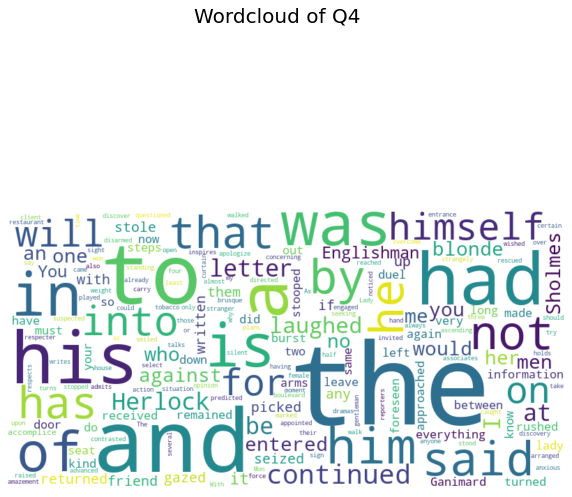

In [703]:
from wordcloud import WordCloud
def word_cloud(char, title):
    f = plt.figure (figsize=(10, 10))
    f.suptitle(title, fontsize=20)
    word_cloud = WordCloud(collocations = False,background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(char)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot1 = word_cloud(word_dict, 'Wordcloud of Q4')
Q4_list[book_index-1]=word_dict

In [704]:
# Q5:When and how the detective/detectives and the perpetrators co-occur - chapter #, the sentence(s) # in a chapter,
Q5_answer=[]
for d in detective_ent:
    #print(position_d)
    for p in perpetrator_ent:
#         print("\n"+d.name+" and "+p.name)
        pattern = p.name
        for position in d.position:
            sent=sentence_total[position[0]-1][position[1]-1]
            match=re.search(pattern, sent)
            if match:
#                 print(position)
#                 print(sent)
                Q5_answer.append([d.name+" and "+p.name,position])
print(Q5_answer)
Q5_list[book_index-1]=Q5_answer

[['Ganimard and Lupin', [1, 392]], ['Ganimard and Lupin', [1, 756]], ['Ganimard and Lupin', [2, 529]], ['Ganimard and Lupin', [2, 530]], ['Ganimard and Lupin', [2, 532]], ['Ganimard and Lupin', [6, 341]], ['Ganimard and Lupin', [6, 585]], ['Ganimard and Lupin', [6, 600]], ['Herlock Sholmes and Lupin', [1, 171]], ['Herlock Sholmes and Lupin', [3, 89]], ['Herlock Sholmes and Lupin', [3, 276]], ['Herlock Sholmes and Lupin', [3, 276]], ['Herlock Sholmes and Lupin', [4, 314]], ['Herlock Sholmes and Lupin', [4, 336]], ['Herlock Sholmes and Lupin', [4, 400]], ['Herlock Sholmes and Lupin', [4, 430]], ['Herlock Sholmes and Lupin', [4, 497]], ['Herlock Sholmes and Lupin', [5, 482]], ['Herlock Sholmes and Lupin', [5, 499]], ['Herlock Sholmes and Lupin', [5, 570]], ['Herlock Sholmes and Lupin', [6, 159]], ['Herlock Sholmes and Lupin', [6, 265]], ['Herlock Sholmes and Lupin', [6, 318]], ['Herlock Sholmes and Lupin', [6, 335]], ['Herlock Sholmes and Lupin', [6, 337]], ['Herlock Sholmes and Lupin', [

In [705]:
# Q6 When are other suspects first introduced - chapter #, the sentence(s) # in a chapter
Q6_answer=[]
for s in suspect_ent:
    print(s.name)
    print(s.position[0])
    Q6_answer.append([s.name,s.position[0]])
Q6_list[book_index-1]=Q6_answer

Clotilde
[4, 232]
Antoinette
[2, 15]
Bleichen
[2, 318]
Madame
[1, 306]
Destange
[4, 164]


In [706]:
print(Q1_list)
print(Q2_list)
print(Q3_list)
# print(Q4_list)
# print(Q5_list)
print(Q6_list)

[[['Ganimard', [1, 219]], ['Folenfant', [3, 24]], ['Dieuzy', [3, 22]]], [['Guerchard', [3, 326]], ['Bonavent', [10, 274]], ['Dieusy', [8, 218]]], [['Ganimard', [1, 392]], ['Herlock Sholmes', [1, 165]]], [['Beautrelet', [1, 365]], ['Ganimard', [2, 66]], ['Filleul', [1, 131]]], [['Ganimard', [1, 379]], ['Dudouis', [5, 229]]]]
[[['Theft', [1, 127]], ['Attack', [3, 391]]], [['Burglary', [8, 181]], ['Plundered', [8, 110]], ['Theft', [9, 35]]], [['Burglary', [1, 57]], ['Abduction', [1, 296]], ['Murder', [2, 40]], ['Framed', [2, 337]]], [['Seize', [4, 312]], ['Fight', [10, 7]], ['Disguise & deceive', [10, 52]]], [['Attack', [4, 112]]]]
[[['Lupin', [1, 17]]], [['Lupin', [3, 179]], ['Duke', [1, 15]]], [['Lupin', [1, 171]]], [['Lupin', [2, 349]], ['ValmÃ©ras', [6, 27]]], [['Lupin', [1, 15]]]]
[[['Varin', [6, 245]], ['Henriette', [5, 134]]], [['Duke', [1, 15]], ['Mademoiselle', [2, 176]]], [['Clotilde', [4, 232]], ['Antoinette', [2, 15]], ['Bleichen', [2, 318]], ['Madame', [1, 306]], ['Destange',

In [707]:
#create table
book_name = ['The Extra Ordinary Adventure of Lupin','Arsene Lupin','Lupin vs Herlock Sholmes','The Hollow Needle','The Confession of Lupin']

#Q1:When does the investigator occur for the first time -  chapter #, the sentence(s) # in a chapter

table_Q1 = {'Book Name':book_name,"investigator":[],'Chapter No.': [],'Sentence No.': []}
for investigator in Q1_list:
    d_list=[]
    c_list=[]
    s_list=[]
    if investigator:
        for d in investigator:
            #print(d[1][1])
            d_list.append(d[0])
            c_list.append("Chapter "+str(d[1][0]))
            s_list.append("Sentence "+str(d[1][1]))
        #print(s_list)
    table_Q1["investigator"].append(d_list)
    table_Q1['Chapter No.'].append(c_list)
    table_Q1['Sentence No.'].append(s_list)


print(table_Q1)
table_Q1_show = pd.DataFrame(table_Q1)
table_Q1_show

{'Book Name': ['The Extra Ordinary Adventure of Lupin', 'Arsene Lupin', 'Lupin vs Herlock Sholmes', 'The Hollow Needle', 'The Confession of Lupin'], 'investigator': [['Ganimard', 'Folenfant', 'Dieuzy'], ['Guerchard', 'Bonavent', 'Dieusy'], ['Ganimard', 'Herlock Sholmes'], ['Beautrelet', 'Ganimard', 'Filleul'], ['Ganimard', 'Dudouis']], 'Chapter No.': [['Chapter 1', 'Chapter 3', 'Chapter 3'], ['Chapter 3', 'Chapter 10', 'Chapter 8'], ['Chapter 1', 'Chapter 1'], ['Chapter 1', 'Chapter 2', 'Chapter 1'], ['Chapter 1', 'Chapter 5']], 'Sentence No.': [['Sentence 219', 'Sentence 24', 'Sentence 22'], ['Sentence 326', 'Sentence 274', 'Sentence 218'], ['Sentence 392', 'Sentence 165'], ['Sentence 365', 'Sentence 66', 'Sentence 131'], ['Sentence 379', 'Sentence 229']]}


,Book Name,investigator,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,"[Ganimard, Folenfant, Dieuzy]","[Chapter 1, Chapter 3, Chapter 3]","[Sentence 219, Sentence 24, Sentence 22]"
1,Arsene Lupin,"[Guerchard, Bonavent, Dieusy]","[Chapter 3, Chapter 10, Chapter 8]","[Sentence 326, Sentence 274, Sentence 218]"
2,Lupin vs Herlock Sholmes,"[Ganimard, Herlock Sholmes]","[Chapter 1, Chapter 1]","[Sentence 392, Sentence 165]"
3,The Hollow Needle,"[Beautrelet, Ganimard, Filleul]","[Chapter 1, Chapter 2, Chapter 1]","[Sentence 365, Sentence 66, Sentence 131]"
4,The Confession of Lupin,"[Ganimard, Dudouis]","[Chapter 1, Chapter 5]","[Sentence 379, Sentence 229]"


In [708]:
#When is the crime first mentioned - the type of the crime and the details -  chapter #, the sentence(s) # in a chapter,

table_Q2 = {'Book Name':book_name,"Crime":[],'Chapter No.': [],'Sentence No.': []}
for crime_mention in Q2_list:
    d_list=[]
    c_list=[]
    s_list=[]
    if crime_mention:
        for d in crime_mention:
            #print(d[1][1])
            d_list.append(d[0])
            c_list.append("Chapter "+str(d[1][0]))
            s_list.append("Sentence "+str(d[1][1]))
        #print(s_list)
    table_Q2["Crime"].append(d_list)
    table_Q2['Chapter No.'].append(c_list)
    table_Q2['Sentence No.'].append(s_list)


print(table_Q2)
table_Q2_show = pd.DataFrame(table_Q2)
table_Q2_show

{'Book Name': ['The Extra Ordinary Adventure of Lupin', 'Arsene Lupin', 'Lupin vs Herlock Sholmes', 'The Hollow Needle', 'The Confession of Lupin'], 'Crime': [['Theft', 'Attack'], ['Burglary', 'Plundered', 'Theft'], ['Burglary', 'Abduction', 'Murder', 'Framed'], ['Seize', 'Fight', 'Disguise & deceive'], ['Attack']], 'Chapter No.': [['Chapter 1', 'Chapter 3'], ['Chapter 8', 'Chapter 8', 'Chapter 9'], ['Chapter 1', 'Chapter 1', 'Chapter 2', 'Chapter 2'], ['Chapter 4', 'Chapter 10', 'Chapter 10'], ['Chapter 4']], 'Sentence No.': [['Sentence 127', 'Sentence 391'], ['Sentence 181', 'Sentence 110', 'Sentence 35'], ['Sentence 57', 'Sentence 296', 'Sentence 40', 'Sentence 337'], ['Sentence 312', 'Sentence 7', 'Sentence 52'], ['Sentence 112']]}


,Book Name,Crime,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,"[Theft, Attack]","[Chapter 1, Chapter 3]","[Sentence 127, Sentence 391]"
1,Arsene Lupin,"[Burglary, Plundered, Theft]","[Chapter 8, Chapter 8, Chapter 9]","[Sentence 181, Sentence 110, Sentence 35]"
2,Lupin vs Herlock Sholmes,"[Burglary, Abduction, Murder, Framed]","[Chapter 1, Chapter 1, Chapter 2, Chapter 2]","[Sentence 57, Sentence 296, Sentence 40, Sente..."
3,The Hollow Needle,"[Seize, Fight, Disguise & deceive]","[Chapter 4, Chapter 10, Chapter 10]","[Sentence 312, Sentence 7, Sentence 52]"
4,The Confession of Lupin,[Attack],[Chapter 4],[Sentence 112]


In [709]:
#When is the perpetrator first mentioned - chapter #, the sentence(s) # in a chapter,
table_Q3 = {'Book Name':book_name,"Perpetrator":[],'Chapter No.': [],'Sentence No.': []}
for perpetrator_mention in Q3_list:
    d_list=[]
    c_list=[]
    s_list=[]
    if perpetrator_mention:
        for d in perpetrator_mention:
            #print(d[1][1])
            d_list.append(d[0])
            c_list.append("Chapter "+str(d[1][0]))
            s_list.append("Sentence "+str(d[1][1]))
        #print(s_list)
    table_Q3["Perpetrator"].append(d_list)
    table_Q3['Chapter No.'].append(c_list)
    table_Q3['Sentence No.'].append(s_list)


print(table_Q3)
table_Q3_show = pd.DataFrame(table_Q3)
table_Q3_show

{'Book Name': ['The Extra Ordinary Adventure of Lupin', 'Arsene Lupin', 'Lupin vs Herlock Sholmes', 'The Hollow Needle', 'The Confession of Lupin'], 'Perpetrator': [['Lupin'], ['Lupin', 'Duke'], ['Lupin'], ['Lupin', 'ValmÃ©ras'], ['Lupin']], 'Chapter No.': [['Chapter 1'], ['Chapter 3', 'Chapter 1'], ['Chapter 1'], ['Chapter 2', 'Chapter 6'], ['Chapter 1']], 'Sentence No.': [['Sentence 17'], ['Sentence 179', 'Sentence 15'], ['Sentence 171'], ['Sentence 349', 'Sentence 27'], ['Sentence 15']]}


,Book Name,Perpetrator,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,[Lupin],[Chapter 1],[Sentence 17]
1,Arsene Lupin,"[Lupin, Duke]","[Chapter 3, Chapter 1]","[Sentence 179, Sentence 15]"
2,Lupin vs Herlock Sholmes,[Lupin],[Chapter 1],[Sentence 171]
3,The Hollow Needle,"[Lupin, ValmÃ©ras]","[Chapter 2, Chapter 6]","[Sentence 349, Sentence 27]"
4,The Confession of Lupin,[Lupin],[Chapter 1],[Sentence 15]


In [710]:
#Q4: What are the 3 words that occur around the perpetrator on each mention (i.e., the three words preceding, and the three words following the mention of a perpetrator),
#photos

In [711]:
#Q5: When and how the detective/detectives and the perpetrators co-occur - chapter #, the sentence(s) # in a chapter,
table_Q5 = {'Book Name':book_name,"Co-occur":[],'Chapter No.': [],'Sentence No.': []}
for cooccur_mention in Q5_list:
    d_list=[]
    c_list=[]
    s_list=[]
    if cooccur_mention:
        for d in cooccur_mention:
            #print(d[1][1])
            d_list.append(d[0])
            c_list.append("Chapter "+str(d[1][0]))
            s_list.append("Sentence "+str(d[1][1]))
        #print(s_list)
    table_Q5["Co-occur"].append(d_list)
    table_Q5['Chapter No.'].append(c_list)
    table_Q5['Sentence No.'].append(s_list)


print(table_Q5)
table_Q5_show = pd.DataFrame(table_Q5)
table_Q5_show

{'Book Name': ['The Extra Ordinary Adventure of Lupin', 'Arsene Lupin', 'Lupin vs Herlock Sholmes', 'The Hollow Needle', 'The Confession of Lupin'], 'Co-occur': [['Ganimard and Lupin', 'Ganimard and Lupin'], ['Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Lupin', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerchard and Duke', 'Guerc

,Book Name,Co-occur,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,"[Ganimard and Lupin, Ganimard and Lupin]","[Chapter 2, Chapter 3]","[Sentence 50, Sentence 398]"
1,Arsene Lupin,"[Guerchard and Lupin, Guerchard and Lupin, Gue...","[Chapter 8, Chapter 11, Chapter 11, Chapter 13...","[Sentence 182, Sentence 50, Sentence 84, Sente..."
2,Lupin vs Herlock Sholmes,"[Ganimard and Lupin, Ganimard and Lupin, Ganim...","[Chapter 1, Chapter 1, Chapter 2, Chapter 2, C...","[Sentence 392, Sentence 756, Sentence 529, Sen..."
3,The Hollow Needle,"[Beautrelet and Lupin, Beautrelet and Lupin, B...","[Chapter 2, Chapter 2, Chapter 5, Chapter 5, C...","[Sentence 405, Sentence 449, Sentence 300, Sen..."
4,The Confession of Lupin,"[Ganimard and Lupin, Ganimard and Lupin, Ganim...","[Chapter 5, Chapter 5, Chapter 5, Chapter 5, C...","[Sentence 110, Sentence 169, Sentence 172, Sen..."


In [712]:
print(Q5_list)

[[['Ganimard and Lupin', [2, 50]], ['Ganimard and Lupin', [3, 398]]], [['Guerchard and Lupin', [8, 182]], ['Guerchard and Lupin', [11, 50]], ['Guerchard and Lupin', [11, 84]], ['Guerchard and Lupin', [13, 212]], ['Guerchard and Lupin', [16, 29]], ['Guerchard and Lupin', [17, 118]], ['Guerchard and Lupin', [18, 72]], ['Guerchard and Lupin', [19, 51]], ['Guerchard and Lupin', [20, 203]], ['Guerchard and Lupin', [22, 151]], ['Guerchard and Lupin', [22, 183]], ['Guerchard and Lupin', [22, 267]], ['Guerchard and Lupin', [23, 103]], ['Guerchard and Lupin', [23, 153]], ['Guerchard and Lupin', [23, 277]], ['Guerchard and Duke', [8, 181]], ['Guerchard and Duke', [8, 187]], ['Guerchard and Duke', [9, 42]], ['Guerchard and Duke', [9, 119]], ['Guerchard and Duke', [10, 140]], ['Guerchard and Duke', [10, 276]], ['Guerchard and Duke', [11, 13]], ['Guerchard and Duke', [11, 50]], ['Guerchard and Duke', [11, 111]], ['Guerchard and Duke', [13, 129]], ['Guerchard and Duke', [14, 36]], ['Guerchard and Du

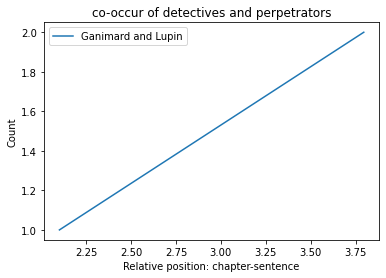

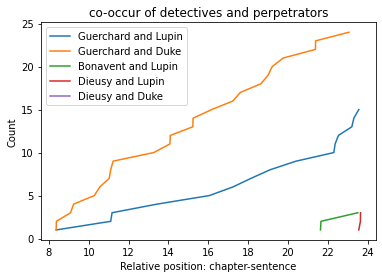

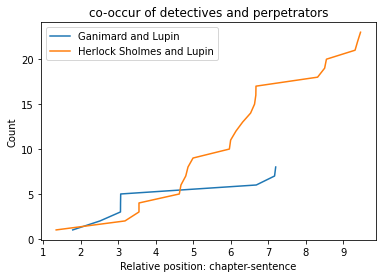

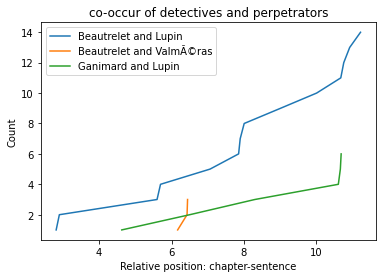

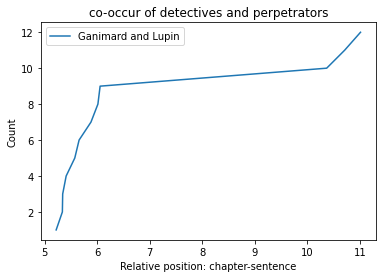

In [715]:
#Q5: display
# cooccur_mention = Q5_list[1]
# if True:
for cooccur_mention in Q5_list:
    plot_Q5 = {"Co-occur name":[],"Count":[],"relative_position":[]}
    if cooccur_mention:
        for d in cooccur_mention:
            relative_position = (d[1][0]*500+d[1][1])/500
            if (d[0] in plot_Q5["Co-occur name"]):
                index = plot_Q5["Co-occur name"].index(d[0])
                plot_Q5["Count"][index].append(1)
                plot_Q5["relative_position"][index].append(relative_position)
            else:
                plot_Q5["Co-occur name"].append(d[0])
                plot_Q5["Count"].append([1])
                plot_Q5["relative_position"].append([relative_position])
        

        for cooccur in plot_Q5["Co-occur name"]:
            index = plot_Q5["Co-occur name"].index(cooccur)
            x_ralativeposition=plot_Q5["relative_position"][index]
            y_cooccurcount=range(1,len(plot_Q5["Count"][index])+1)
            plt.plot(x_ralativeposition,y_cooccurcount,label = cooccur)
            
        
        plt.title("co-occur of detectives and perpetrators")
        plt.ylabel('Count')
        plt.xlabel('Relative position: chapter-sentence')
        plt.legend()
        plt.show()
        #print(s_list)zz
#print(plot_Q5)

In [599]:
#Q6: When are other suspects first introduced - chapter #, the sentence(s) # in a chapter

table_Q6 = {'Book Name':book_name,"Suspects":[],'Chapter No.': [],'Sentence No.': []}
for suspect_mention in Q6_list:
    d_list=[]
    c_list=[]
    s_list=[]
    if suspect_mention:
        for d in suspect_mention:
            #print(d[1][1])
            d_list.append(d[0])
            c_list.append("Chapter "+str(d[1][0]))
            s_list.append("Sentence "+str(d[1][1]))
        #print(s_list)
    table_Q6["Suspects"].append(d_list)
    table_Q6['Chapter No.'].append(c_list)
    table_Q6['Sentence No.'].append(s_list)


print(table_Q6)
table_Q6_show = pd.DataFrame(table_Q6)
table_Q6_show

{'Book Name': ['The Extra Ordinary Adventure of Lupin', 'Arsene Lupin', 'Lupin vs Herlock Sholmes', 'The Hollow Needle', 'The Confession of Lupin'], 'Suspects': [['Varin', 'Henriette'], ['Duke', 'Mademoiselle'], ['Clotilde', 'Antoinette', 'Bleichen', 'Madame', 'Destange'], ['BrÃ©doux'], ['Sparmiento']], 'Chapter No.': [['Chapter 6', 'Chapter 5'], ['Chapter 1', 'Chapter 2'], ['Chapter 4', 'Chapter 2', 'Chapter 2', 'Chapter 1', 'Chapter 4'], ['Chapter 3'], ['Chapter 10']], 'Sentence No.': [['Sentence 245', 'Sentence 134'], ['Sentence 15', 'Sentence 176'], ['Sentence 232', 'Sentence 15', 'Sentence 318', 'Sentence 306', 'Sentence 164'], ['Sentence 482'], ['Sentence 43']]}


,Book Name,Suspects,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,"[Varin, Henriette]","[Chapter 6, Chapter 5]","[Sentence 245, Sentence 134]"
1,Arsene Lupin,"[Duke, Mademoiselle]","[Chapter 1, Chapter 2]","[Sentence 15, Sentence 176]"
2,Lupin vs Herlock Sholmes,"[Clotilde, Antoinette, Bleichen, Madame, Desta...","[Chapter 4, Chapter 2, Chapter 2, Chapter 1, C...","[Sentence 232, Sentence 15, Sentence 318, Sent..."
3,The Hollow Needle,[BrÃ©doux],[Chapter 3],[Sentence 482]
4,The Confession of Lupin,[Sparmiento],[Chapter 10],[Sentence 43]
